# Exemplos de Modelos

In [668]:
import sys
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

filepath=os.path.join("..","02.codigo")
sys.path.append(filepath)

from funcoes_dataframe import *
from funcoes_plot import *

%reload_ext autoreload
%autoreload 2

In [669]:
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, confusion_matrix
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import pickle

import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, LSTM 
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint 
import random as python_random

In [670]:
np.random.seed(12)
python_random.seed(12)
tf.random.set_seed(12)

In [597]:
TIPO_DE_COMPRESSAO = 'gzip'

In [598]:
diretorio_leitura = os.path.join("..","03.dataset")

In [599]:
df = pd.read_csv(os.path.join(diretorio_leitura, "df.csv.gz"), compression=TIPO_DE_COMPRESSAO, parse_dates=['Date'], index_col=0)

In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5437 entries, 2003-10-16 to 2019-10-18
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Vazao OQ 1 (11FC50.PV)                    5437 non-null   float64
 1   Vazao OQ 2 (11FC52.PV)                    5437 non-null   float64
 2   Vazao OQ 3 (11FC55.PV)                    5437 non-null   float64
 3   Pressao torre (11PC53.PV)                 5437 non-null   float64
 4   HCs Totais AP (11SC501_HC.L)              2946 non-null   float64
 5   Cloreto (purga) (11SC50_CL.L)             2946 non-null   float64
 6   pH (purga) (11SC50_PH.L)                  5436 non-null   float64
 7   Temperatura OQ saida 11T15 (11TR0001.AO)  5437 non-null   float64
 8   Temperatura topo torre (11TR0023.AO)      5437 non-null   float64
 9   Temperatura OQ entrada (11TR28.AO)        5437 non-null   float64
 10  Cp tubo           

In [601]:
df.describe()

,Vazao OQ 1 (11FC50.PV),Vazao OQ 2 (11FC52.PV),Vazao OQ 3 (11FC55.PV),Pressao torre (11PC53.PV),HCs Totais AP (11SC501_HC.L),Cloreto (purga) (11SC50_CL.L),pH (purga) (11SC50_PH.L),Temperatura OQ saida 11T15 (11TR0001.AO),Temperatura topo torre (11TR0023.AO),Temperatura OQ entrada (11TR28.AO),Cp tubo,Vazao tubo,Vazao casco,Calor Trocado
count,5437.000000,5437.000000,5437.000000,5437.00000,2946.000000,2946.000000,5436.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5.437000e+03
mean,1629.760453,1883.962868,1662.252559,6.04775,20.049898,1.883229,9.291336,178.912935,165.139781,192.190209,0.476365,5175.975880,662.228774,3.268907e+07
std,351.363291,454.999506,375.038171,0.26051,80.145212,1.747253,1.017066,2.877043,1.938211,2.974484,0.001807,637.291356,105.721615,5.255019e+06
min,779.139000,938.913000,108.973000,5.04007,-3.665500,0.000000,0.000000,170.301000,160.814000,181.370000,0.470564,3831.249000,175.999988,8.698866e+06
25%,1356.280000,1508.550000,1447.550000,5.89899,0.000000,0.400000,9.100000,177.049000,163.994000,190.369000,0.475213,4707.970000,593.229618,2.924119e+07
50%,1555.760000,1822.620000,1824.660000,6.00008,5.328000,1.611650,9.354200,178.688000,164.784000,192.113000,0.476233,4994.740000,657.018403,3.244131e+07
75%,1874.510000,2234.630000,1876.630000,6.19866,6.201125,2.800000,9.600000,180.622000,165.433000,194.109000,0.477501,5547.660000,725.841025,3.585968e+07
max,2825.740000,2936.720000,2374.830000,7.00559,2623.400000,10.000000,55.335000,193.523000,172.862000,203.510000,0.484252,7237.410000,1108.021298,5.481735e+07


### Tipos de plot

[1 - Modelo Digital Twin](#1p) |
[2 - Modelo Classificação](#2p) |
[3 - Modelo Digital Twin - Keras](#3p)

***
<a id='1p'></a>
### 1 - Modelo Digital Twin

In [602]:
cols = ['Temperatura OQ entrada (11TR28.AO)',
        'Temperatura OQ saida 11T15 (11TR0001.AO)',
       ]

label = 'Temperatura topo torre (11TR0023.AO)'

(5435, 14)


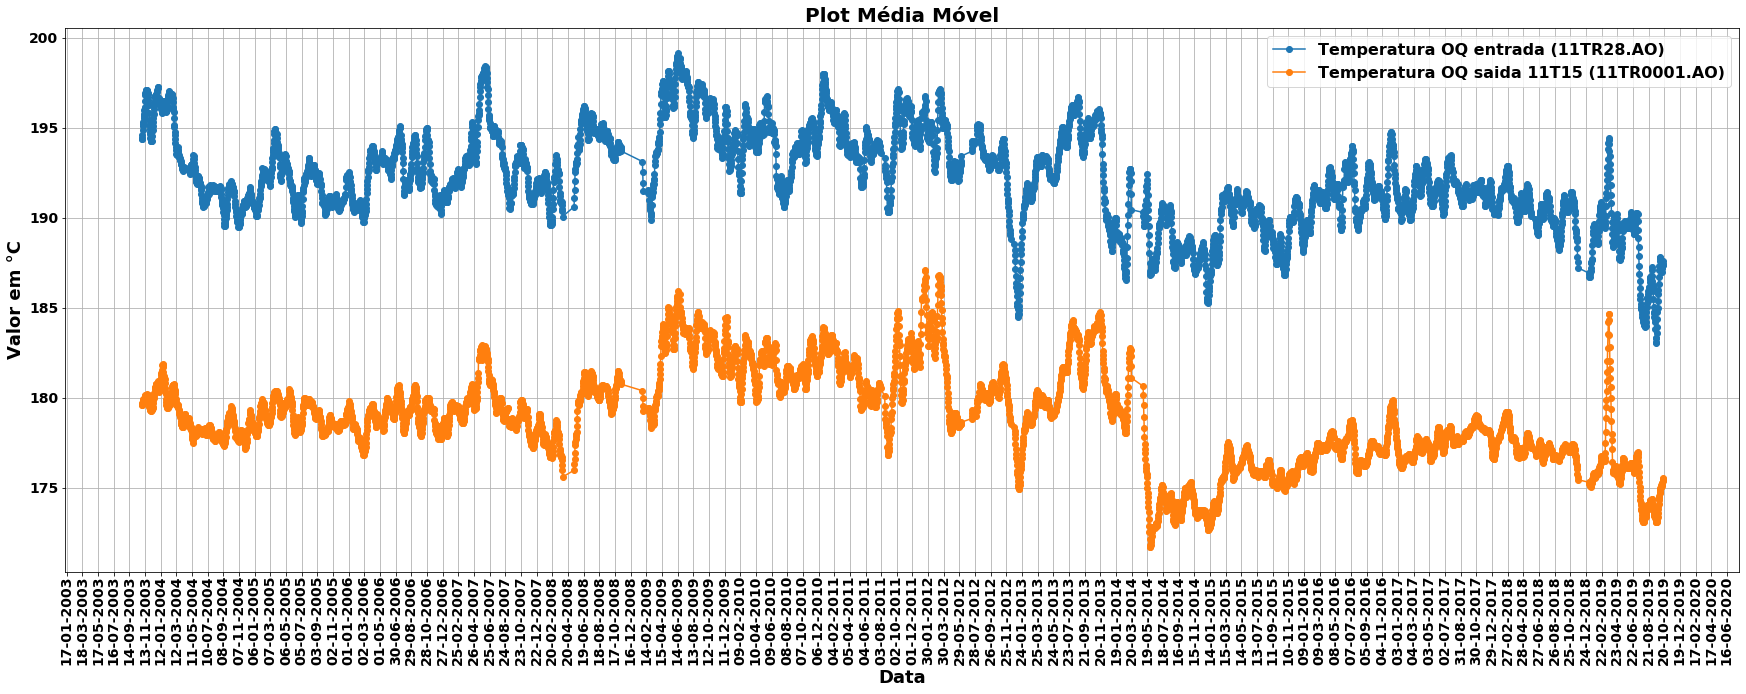

In [603]:
ini = df.index.min()
fim = df.index.max()

params = {
    'days_interval':60,
    'titulo': 'Plot Média Móvel',
    'ylabel': 'Valor em °C',
    'rolling_time':15
}

plot_full(df, 
            cols,
            ini, fim, **params);

__Escolha do momento bom da maquina__

In [604]:
date_bom_ini = df.index
date_bom_fim = '2005-01-01 00:00:00'

df_bom = df[((df.index >= date_bom_ini) & (df.index <= date_bom_fim))]   

In [605]:
X = df_bom.filter(items=cols).values

In [606]:
y = df_bom[label]

__Treinar Modelo__

In [607]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=12)

param = {'hidden_layer_sizes': (32,8),
          'activation': 'relu',
          'solver': 'adam',
          'learning_rate': 'adaptive',
          'learning_rate_init': 0.001,
          'random_state':12,
          'alpha': 0.0001,
          'max_iter': 1000}


model_dt = MLPRegressor(**param)    
model_dt.fit(X_train, y_train.values)

y_predict = model_dt.predict(X_test)

__Resultado__

In [608]:
rmse = np.sqrt(mean_squared_error(y_test.values, y_predict))
print('RMSE ::>> '+str(rmse))
print('Score R2 ::>> '+str(r2_score(y_test.values, y_predict)))

RMSE ::>> 2.157347122538354
Score R2 ::>> -6.722063739269755


In [609]:
pred = pd.DataFrame({'predicao': y_predict,'Date': y_test.index}).set_index(['Date'])
df_result = pd.concat([y_test, pred], axis=1)
df_result['abs'] = abs(y_test - y_predict)
df_result.sort_index(inplace=True, axis = 0) 

(84, 3)


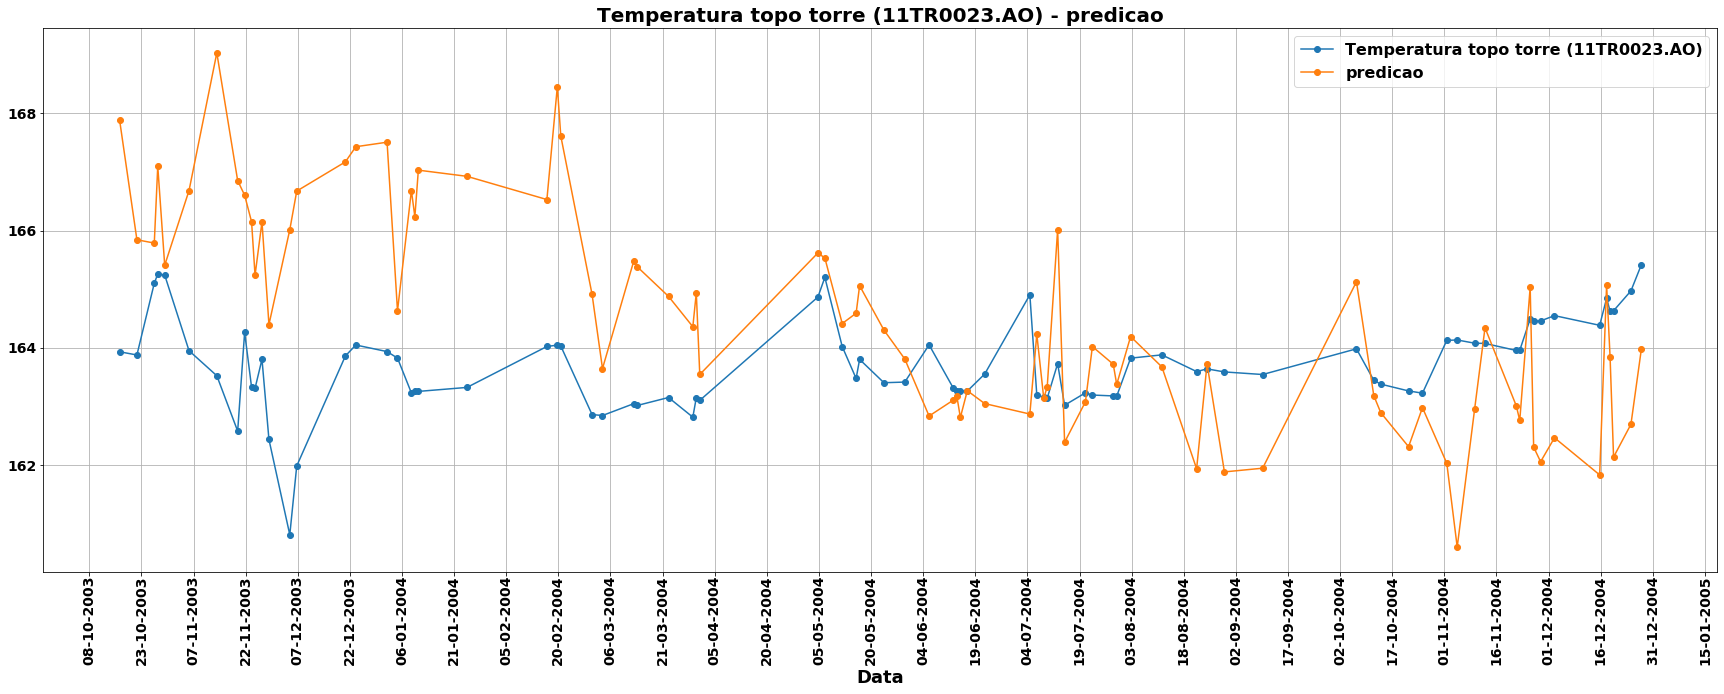

In [610]:
plot_full(df_result, [label,'predicao'], df_result.index.min(), df_result.index.max(),
                    minutes_interval=60, days_interval=15)

__Validação__

In [611]:
df_validation = df[~df.index.isin(df_bom.index)]

In [612]:
X_test_val = df_validation.filter(items=cols)
y_test_val = df_validation[label]

y_predict_val = model_dt.predict(X_test_val)

rmse = np.sqrt(mean_squared_error(y_test_val, y_predict_val))
print('RMSE ::>> '+str(rmse))
print('Score R2 ::>> '+str(r2_score(y_test_val, y_predict_val)))

pred_val = pd.DataFrame({'predicao': y_predict_val,'Date': y_test_val.index}).set_index(['Date'])
df_result_val = pd.concat([y_test_val, pred_val], axis=1)

RMSE ::>> 2.9831420634525343
Score R2 ::>> -1.317242158925866


(5007, 2)


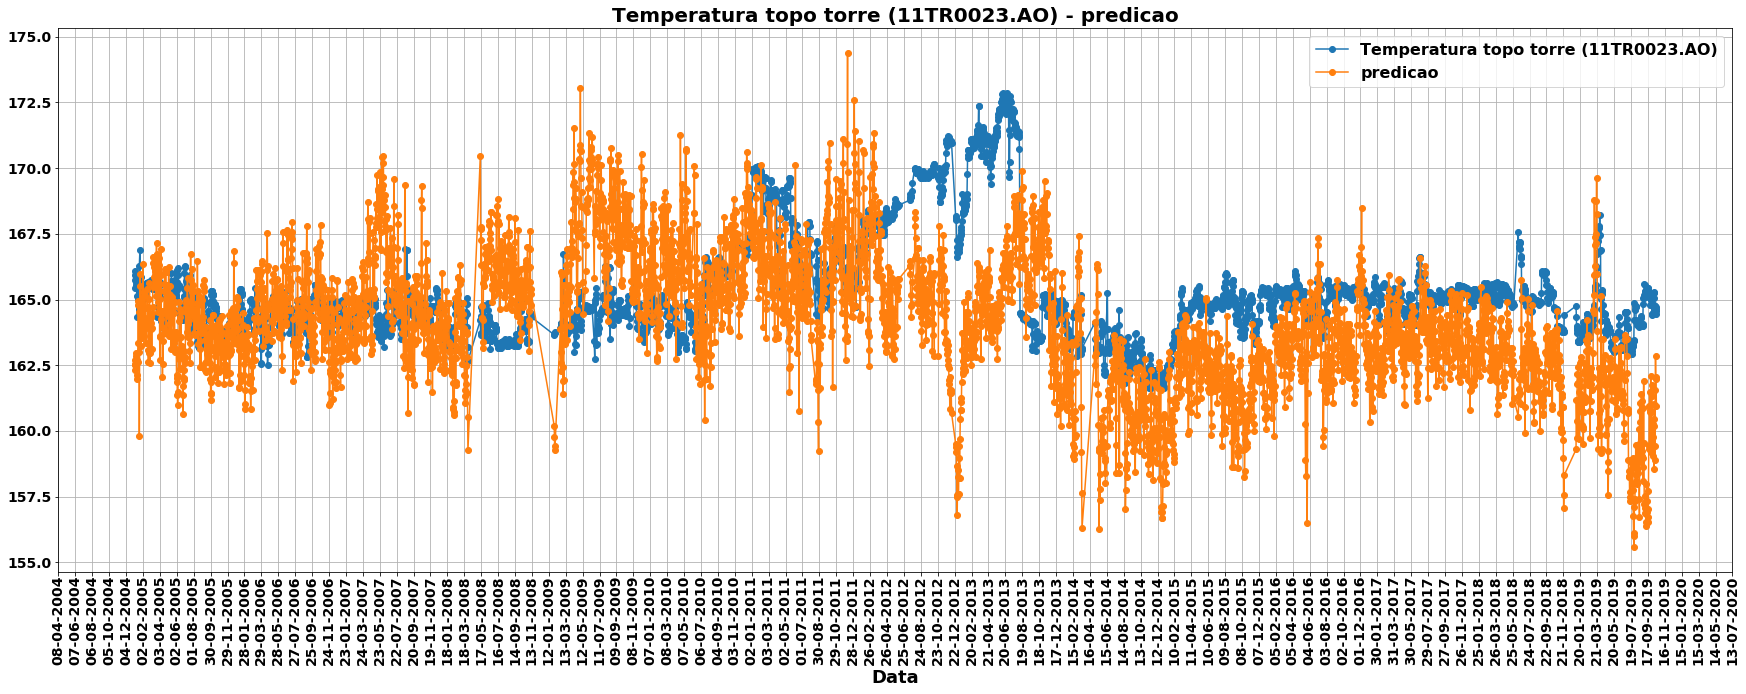

In [613]:
plot_full(df_result_val, [label,'predicao'], df_result_val.index.min(), df_result_val.index.max(),
                    minutes_interval=5, days_interval=60)

(5007, 2)


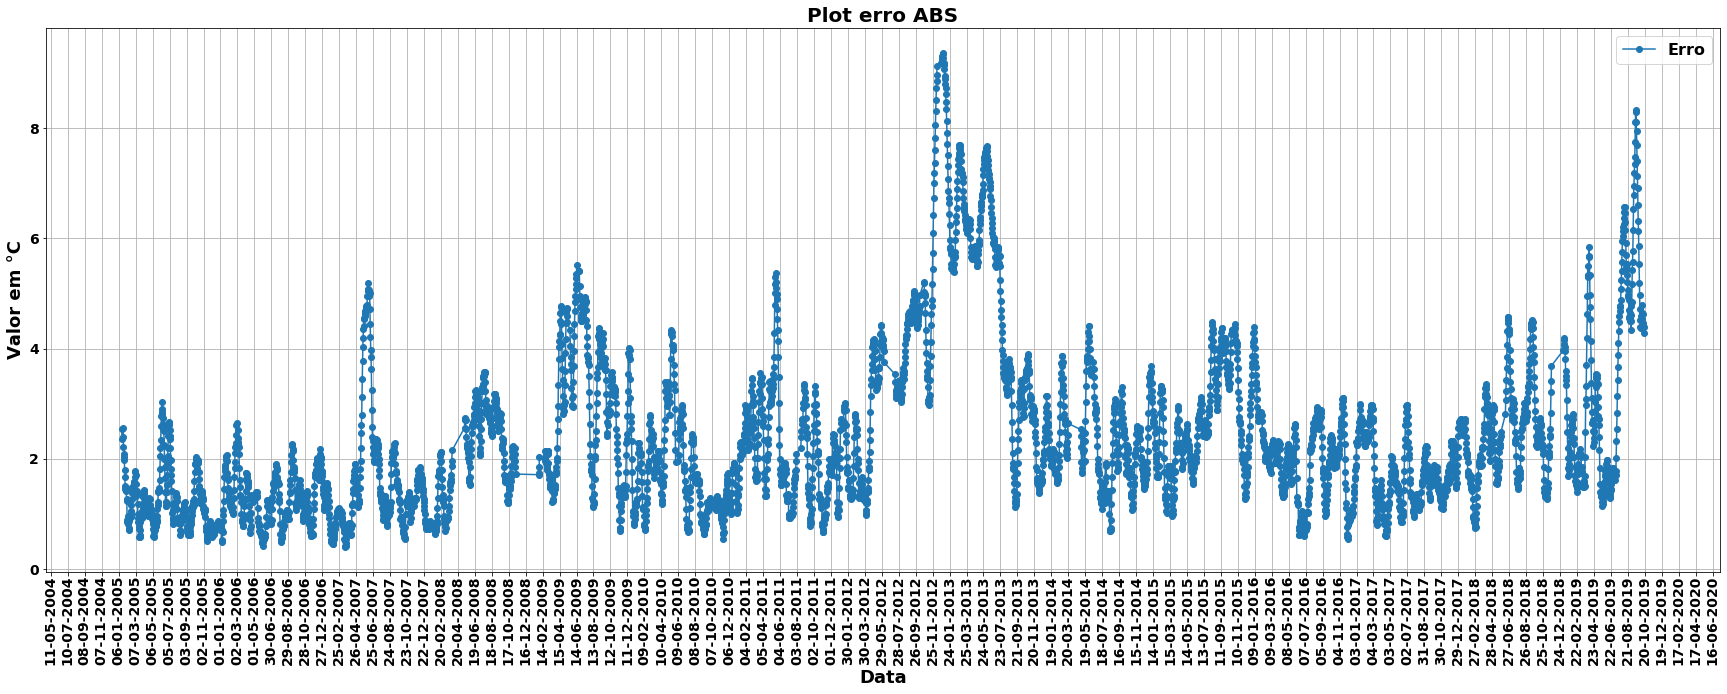

In [614]:
ini = df_result_val.index.min()
fim = df_result_val.index.max()

params = {
    'minutes_interval':5, 
    'days_interval':60,
    'titulo': 'Plot erro ABS',
    'ylabel': 'Valor em °C',
    'rolling_time':15,
    'error': True,
    'abs_error': True,
}

plot_full(df_result_val, 
            [label,'predicao'],
            ini, fim, **params);

***
<a id='2p'></a>
### 2 - Modelo Classificação

In [615]:
df_class = df.copy()

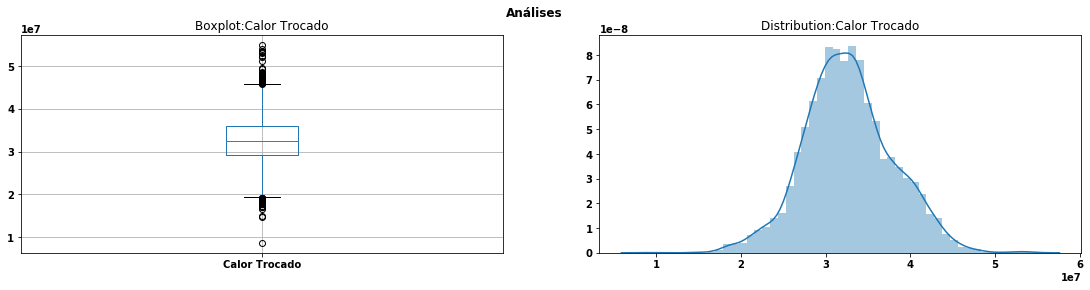

In [616]:
plot_dist(df_class,['Calor Trocado'],'Análises')

In [617]:
df_class.loc[(df_class['Calor Trocado'] <=  3e+07), 'categoria'] = 0
df_class.loc[(df_class['Calor Trocado'] >  3e+07) & (df_class['Calor Trocado'] <=  4e+07), 'categoria'] = 1
df_class.loc[(df_class['Calor Trocado'] >  4e+07), 'categoria'] = 2

In [618]:
cols = ['Temperatura OQ entrada (11TR28.AO)',
        'Temperatura OQ saida 11T15 (11TR0001.AO)',
        'Temperatura topo torre (11TR0023.AO)'
       ]

label = 'categoria'

In [619]:
X = df_class.filter(items=cols).values

In [620]:
y = df_class[label]

__Treinar Modelo__

In [621]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=12)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

param = {'n_estimators': 2000, 
         'max_depth': 6, 
         'min_samples_split': 4, 
         'learning_rate': 0.01, 
         'loss': 'deviance', 
         'subsample': 0.5,
         'random_state':12}

model_class = GradientBoostingClassifier(**param)    
model_class.fit(X_train_sc, y_train.values)

y_predict = model_class.predict(scaler.transform(X_test))

__Resultado__

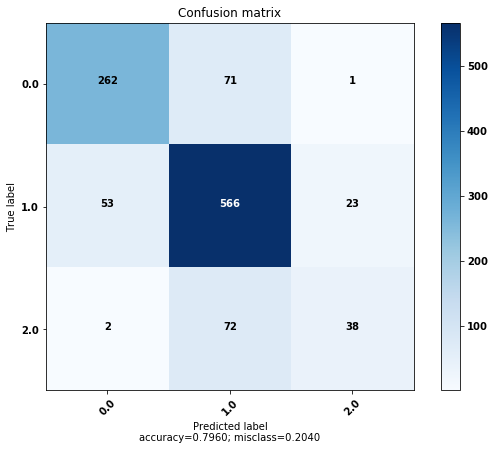

In [622]:
cm = confusion_matrix(y_test, y_predict)
plot_confusion_matrix(cm, sorted(df_class[label].unique()), normalize=False)

***
<a id='3p'></a>
### 3 - Modelo Digital Twin - keras

In [671]:
cols = ['Temperatura OQ entrada (11TR28.AO)',
        'Temperatura OQ saida 11T15 (11TR0001.AO)',
        'Vazao OQ 1 (11FC50.PV)',
        'Vazao OQ 2 (11FC52.PV)',
        'Vazao OQ 3 (11FC55.PV)'
       ]

label = 'Temperatura topo torre (11TR0023.AO)'

In [672]:
date_bom_ini = df.index
date_bom_fim = '2005-01-01 00:00:00'

df_bom = df[((df.index >= date_bom_ini) & (df.index <= date_bom_fim))]  

In [673]:
X = df_bom.filter(items=cols).values

In [674]:
y = df_bom[label]

In [675]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=12)

normalizador = MinMaxScaler(feature_range=(0,1))
normalizador = normalizador.fit(X_train)
X_train_norm = normalizador.transform(X_train)
X_test_norm = normalizador.transform(X_test)

In [684]:
model_k = Sequential(
    [ 
        Dense(units=32, activation = 'relu', input_dim=5),
        Dropout(0.2),
        Dense(units=32, activation = 'relu'),
        Dropout(0.2),
        Dense(units=32, activation = 'relu'),
        Dense(units=1, activation = 'linear')
    ])

model_k.compile(loss = 'mean_absolute_error', 
                optimizer = 'adam',
                metrics = ['mean_absolute_error'],
               )

model_k.summary()

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_323 (Dense)            (None, 32)                192       
_________________________________________________________________
dropout_171 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_324 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_172 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_325 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_326 (Dense)            (None, 1)                 33        
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
___________________________________________________

In [685]:
#es = EarlyStopping(monitor='loss', min_delta=1e-20, patience=20, verbose=1)
#rlr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath=os.path.join("out",'model_k.h5'), monitor='loss', save_best_only=True, verbose=1)

In [686]:
model_k.fit(X_train_norm, y_train.values, 
            batch_size=200, 
            epochs=1000, 
            verbose=2,
            callbacks=[mcp] #es , rlr
);

Train on 342 samples
Epoch 1/1000

Epoch 00001: loss improved from inf to 163.73301, saving model to out\model_k.h5
342/342 - 0s - loss: 163.7330 - mean_absolute_error: 163.7330
Epoch 2/1000

Epoch 00002: loss improved from 163.73301 to 163.68261, saving model to out\model_k.h5
342/342 - 0s - loss: 163.6826 - mean_absolute_error: 163.6826
Epoch 3/1000

Epoch 00003: loss improved from 163.68261 to 163.63666, saving model to out\model_k.h5
342/342 - 0s - loss: 163.6367 - mean_absolute_error: 163.6367
Epoch 4/1000

Epoch 00004: loss improved from 163.63666 to 163.58919, saving model to out\model_k.h5
342/342 - 0s - loss: 163.5892 - mean_absolute_error: 163.5892
Epoch 5/1000

Epoch 00005: loss improved from 163.58919 to 163.53891, saving model to out\model_k.h5
342/342 - 0s - loss: 163.5389 - mean_absolute_error: 163.5389
Epoch 6/1000

Epoch 00006: loss improved from 163.53891 to 163.47920, saving model to out\model_k.h5
342/342 - 0s - loss: 163.4792 - mean_absolute_error: 163.4792
Epoch 7

Epoch 51/1000

Epoch 00051: loss improved from 117.55477 to 113.23776, saving model to out\model_k.h5
342/342 - 0s - loss: 113.2378 - mean_absolute_error: 113.2378
Epoch 52/1000

Epoch 00052: loss improved from 113.23776 to 108.73292, saving model to out\model_k.h5
342/342 - 0s - loss: 108.7329 - mean_absolute_error: 108.7329
Epoch 53/1000

Epoch 00053: loss improved from 108.73292 to 103.92683, saving model to out\model_k.h5
342/342 - 0s - loss: 103.9268 - mean_absolute_error: 103.9268
Epoch 54/1000

Epoch 00054: loss improved from 103.92683 to 98.75450, saving model to out\model_k.h5
342/342 - 0s - loss: 98.7545 - mean_absolute_error: 98.7545
Epoch 55/1000

Epoch 00055: loss improved from 98.75450 to 93.36285, saving model to out\model_k.h5
342/342 - 0s - loss: 93.3629 - mean_absolute_error: 93.3629
Epoch 56/1000

Epoch 00056: loss improved from 93.36285 to 86.26906, saving model to out\model_k.h5
342/342 - 0s - loss: 86.2691 - mean_absolute_error: 86.2691
Epoch 57/1000

Epoch 00057:

Epoch 112/1000

Epoch 00112: loss did not improve from 20.74183
342/342 - 0s - loss: 21.3478 - mean_absolute_error: 21.3478
Epoch 113/1000

Epoch 00113: loss did not improve from 20.74183
342/342 - 0s - loss: 21.4056 - mean_absolute_error: 21.4056
Epoch 114/1000

Epoch 00114: loss did not improve from 20.74183
342/342 - 0s - loss: 21.7826 - mean_absolute_error: 21.7826
Epoch 115/1000

Epoch 00115: loss did not improve from 20.74183
342/342 - 0s - loss: 21.5642 - mean_absolute_error: 21.5642
Epoch 116/1000

Epoch 00116: loss did not improve from 20.74183
342/342 - 0s - loss: 21.9648 - mean_absolute_error: 21.9648
Epoch 117/1000

Epoch 00117: loss did not improve from 20.74183
342/342 - 0s - loss: 23.0939 - mean_absolute_error: 23.0939
Epoch 118/1000

Epoch 00118: loss did not improve from 20.74183
342/342 - 0s - loss: 22.0146 - mean_absolute_error: 22.0146
Epoch 119/1000

Epoch 00119: loss did not improve from 20.74183
342/342 - 0s - loss: 22.1453 - mean_absolute_error: 22.1453
Epoch 12

Epoch 177/1000

Epoch 00177: loss improved from 19.53789 to 19.09683, saving model to out\model_k.h5
342/342 - 0s - loss: 19.0968 - mean_absolute_error: 19.0968
Epoch 178/1000

Epoch 00178: loss did not improve from 19.09683
342/342 - 0s - loss: 21.5930 - mean_absolute_error: 21.5930
Epoch 179/1000

Epoch 00179: loss did not improve from 19.09683
342/342 - 0s - loss: 21.0144 - mean_absolute_error: 21.0144
Epoch 180/1000

Epoch 00180: loss did not improve from 19.09683
342/342 - 0s - loss: 22.5089 - mean_absolute_error: 22.5089
Epoch 181/1000

Epoch 00181: loss did not improve from 19.09683
342/342 - 0s - loss: 22.2512 - mean_absolute_error: 22.2512
Epoch 182/1000

Epoch 00182: loss did not improve from 19.09683
342/342 - 0s - loss: 21.4826 - mean_absolute_error: 21.4826
Epoch 183/1000

Epoch 00183: loss did not improve from 19.09683
342/342 - 0s - loss: 20.8780 - mean_absolute_error: 20.8780
Epoch 184/1000

Epoch 00184: loss did not improve from 19.09683
342/342 - 0s - loss: 21.0065 - 

Epoch 242/1000

Epoch 00242: loss improved from 18.35425 to 18.02515, saving model to out\model_k.h5
342/342 - 0s - loss: 18.0251 - mean_absolute_error: 18.0251
Epoch 243/1000

Epoch 00243: loss did not improve from 18.02515
342/342 - 0s - loss: 18.8668 - mean_absolute_error: 18.8668
Epoch 244/1000

Epoch 00244: loss did not improve from 18.02515
342/342 - 0s - loss: 18.7325 - mean_absolute_error: 18.7325
Epoch 245/1000

Epoch 00245: loss did not improve from 18.02515
342/342 - 0s - loss: 19.8937 - mean_absolute_error: 19.8937
Epoch 246/1000

Epoch 00246: loss did not improve from 18.02515
342/342 - 0s - loss: 20.5267 - mean_absolute_error: 20.5268
Epoch 247/1000

Epoch 00247: loss did not improve from 18.02515
342/342 - 0s - loss: 19.2675 - mean_absolute_error: 19.2675
Epoch 248/1000

Epoch 00248: loss did not improve from 18.02515
342/342 - 0s - loss: 19.9959 - mean_absolute_error: 19.9959
Epoch 249/1000

Epoch 00249: loss did not improve from 18.02515
342/342 - 0s - loss: 19.8474 - 

Epoch 308/1000

Epoch 00308: loss did not improve from 17.70612
342/342 - 0s - loss: 19.5118 - mean_absolute_error: 19.5118
Epoch 309/1000

Epoch 00309: loss did not improve from 17.70612
342/342 - 0s - loss: 18.6914 - mean_absolute_error: 18.6914
Epoch 310/1000

Epoch 00310: loss did not improve from 17.70612
342/342 - 0s - loss: 18.6189 - mean_absolute_error: 18.6189
Epoch 311/1000

Epoch 00311: loss did not improve from 17.70612
342/342 - 0s - loss: 19.2610 - mean_absolute_error: 19.2610
Epoch 312/1000

Epoch 00312: loss did not improve from 17.70612
342/342 - 0s - loss: 18.9517 - mean_absolute_error: 18.9517
Epoch 313/1000

Epoch 00313: loss did not improve from 17.70612
342/342 - 0s - loss: 18.4929 - mean_absolute_error: 18.4929
Epoch 314/1000

Epoch 00314: loss did not improve from 17.70612
342/342 - 0s - loss: 18.2487 - mean_absolute_error: 18.2487
Epoch 315/1000

Epoch 00315: loss did not improve from 17.70612
342/342 - 0s - loss: 18.1134 - mean_absolute_error: 18.1134
Epoch 31

Epoch 373/1000

Epoch 00373: loss did not improve from 17.14318
342/342 - 0s - loss: 19.6238 - mean_absolute_error: 19.6238
Epoch 374/1000

Epoch 00374: loss did not improve from 17.14318
342/342 - 0s - loss: 18.3272 - mean_absolute_error: 18.3272
Epoch 375/1000

Epoch 00375: loss did not improve from 17.14318
342/342 - 0s - loss: 18.1317 - mean_absolute_error: 18.1317
Epoch 376/1000

Epoch 00376: loss did not improve from 17.14318
342/342 - 0s - loss: 18.0985 - mean_absolute_error: 18.0985
Epoch 377/1000

Epoch 00377: loss did not improve from 17.14318
342/342 - 0s - loss: 18.0478 - mean_absolute_error: 18.0478
Epoch 378/1000

Epoch 00378: loss did not improve from 17.14318
342/342 - 0s - loss: 17.4730 - mean_absolute_error: 17.4730
Epoch 379/1000

Epoch 00379: loss did not improve from 17.14318
342/342 - 0s - loss: 19.0519 - mean_absolute_error: 19.0519
Epoch 380/1000

Epoch 00380: loss did not improve from 17.14318
342/342 - 0s - loss: 18.5941 - mean_absolute_error: 18.5941
Epoch 38

Epoch 438/1000

Epoch 00438: loss did not improve from 15.93711
342/342 - 0s - loss: 17.6061 - mean_absolute_error: 17.6061
Epoch 439/1000

Epoch 00439: loss did not improve from 15.93711
342/342 - 0s - loss: 16.7844 - mean_absolute_error: 16.7844
Epoch 440/1000

Epoch 00440: loss did not improve from 15.93711
342/342 - 0s - loss: 18.2405 - mean_absolute_error: 18.2405
Epoch 441/1000

Epoch 00441: loss did not improve from 15.93711
342/342 - 0s - loss: 16.8509 - mean_absolute_error: 16.8509
Epoch 442/1000

Epoch 00442: loss did not improve from 15.93711
342/342 - 0s - loss: 17.6265 - mean_absolute_error: 17.6265
Epoch 443/1000

Epoch 00443: loss did not improve from 15.93711
342/342 - 0s - loss: 17.3721 - mean_absolute_error: 17.3721
Epoch 444/1000

Epoch 00444: loss did not improve from 15.93711
342/342 - 0s - loss: 17.6231 - mean_absolute_error: 17.6231
Epoch 445/1000

Epoch 00445: loss did not improve from 15.93711
342/342 - 0s - loss: 16.8895 - mean_absolute_error: 16.8895
Epoch 44

Epoch 504/1000

Epoch 00504: loss did not improve from 14.79256
342/342 - 0s - loss: 16.4242 - mean_absolute_error: 16.4242
Epoch 505/1000

Epoch 00505: loss did not improve from 14.79256
342/342 - 0s - loss: 17.1929 - mean_absolute_error: 17.1929
Epoch 506/1000

Epoch 00506: loss did not improve from 14.79256
342/342 - 0s - loss: 17.1807 - mean_absolute_error: 17.1807
Epoch 507/1000

Epoch 00507: loss did not improve from 14.79256
342/342 - 0s - loss: 15.8276 - mean_absolute_error: 15.8276
Epoch 508/1000

Epoch 00508: loss did not improve from 14.79256
342/342 - 0s - loss: 17.5886 - mean_absolute_error: 17.5886
Epoch 509/1000

Epoch 00509: loss did not improve from 14.79256
342/342 - 0s - loss: 15.1432 - mean_absolute_error: 15.1432
Epoch 510/1000

Epoch 00510: loss did not improve from 14.79256
342/342 - 0s - loss: 16.2333 - mean_absolute_error: 16.2333
Epoch 511/1000

Epoch 00511: loss did not improve from 14.79256
342/342 - 0s - loss: 16.4142 - mean_absolute_error: 16.4142
Epoch 51

Epoch 571/1000

Epoch 00571: loss did not improve from 14.79256
342/342 - 0s - loss: 16.1184 - mean_absolute_error: 16.1184
Epoch 572/1000

Epoch 00572: loss did not improve from 14.79256
342/342 - 0s - loss: 15.1662 - mean_absolute_error: 15.1663
Epoch 573/1000

Epoch 00573: loss did not improve from 14.79256
342/342 - 0s - loss: 16.1532 - mean_absolute_error: 16.1532
Epoch 574/1000

Epoch 00574: loss did not improve from 14.79256
342/342 - 0s - loss: 15.9806 - mean_absolute_error: 15.9806
Epoch 575/1000

Epoch 00575: loss improved from 14.79256 to 14.01857, saving model to out\model_k.h5
342/342 - 0s - loss: 14.0186 - mean_absolute_error: 14.0186
Epoch 576/1000

Epoch 00576: loss did not improve from 14.01857
342/342 - 0s - loss: 16.8354 - mean_absolute_error: 16.8354
Epoch 577/1000

Epoch 00577: loss did not improve from 14.01857
342/342 - 0s - loss: 16.3360 - mean_absolute_error: 16.3360
Epoch 578/1000

Epoch 00578: loss did not improve from 14.01857
342/342 - 0s - loss: 14.3022 - 

Epoch 637/1000

Epoch 00637: loss did not improve from 14.01857
342/342 - 0s - loss: 15.9322 - mean_absolute_error: 15.9322
Epoch 638/1000

Epoch 00638: loss did not improve from 14.01857
342/342 - 0s - loss: 14.7210 - mean_absolute_error: 14.7210
Epoch 639/1000

Epoch 00639: loss did not improve from 14.01857
342/342 - 0s - loss: 14.6784 - mean_absolute_error: 14.6784
Epoch 640/1000

Epoch 00640: loss did not improve from 14.01857
342/342 - 0s - loss: 15.7626 - mean_absolute_error: 15.7626
Epoch 641/1000

Epoch 00641: loss did not improve from 14.01857
342/342 - 0s - loss: 14.6020 - mean_absolute_error: 14.6020
Epoch 642/1000

Epoch 00642: loss did not improve from 14.01857
342/342 - 0s - loss: 15.2479 - mean_absolute_error: 15.2479
Epoch 643/1000

Epoch 00643: loss did not improve from 14.01857
342/342 - 0s - loss: 14.1383 - mean_absolute_error: 14.1383
Epoch 644/1000

Epoch 00644: loss did not improve from 14.01857
342/342 - 0s - loss: 15.8035 - mean_absolute_error: 15.8035
Epoch 64

Epoch 703/1000

Epoch 00703: loss did not improve from 13.62103
342/342 - 0s - loss: 14.9093 - mean_absolute_error: 14.9093
Epoch 704/1000

Epoch 00704: loss did not improve from 13.62103
342/342 - 0s - loss: 15.6757 - mean_absolute_error: 15.6757
Epoch 705/1000

Epoch 00705: loss did not improve from 13.62103
342/342 - 0s - loss: 14.2795 - mean_absolute_error: 14.2795
Epoch 706/1000

Epoch 00706: loss did not improve from 13.62103
342/342 - 0s - loss: 14.5331 - mean_absolute_error: 14.5331
Epoch 707/1000

Epoch 00707: loss did not improve from 13.62103
342/342 - 0s - loss: 14.3046 - mean_absolute_error: 14.3046
Epoch 708/1000

Epoch 00708: loss did not improve from 13.62103
342/342 - 0s - loss: 14.8087 - mean_absolute_error: 14.8087
Epoch 709/1000

Epoch 00709: loss did not improve from 13.62103
342/342 - 0s - loss: 15.2370 - mean_absolute_error: 15.2370
Epoch 710/1000

Epoch 00710: loss did not improve from 13.62103
342/342 - 0s - loss: 14.5352 - mean_absolute_error: 14.5352
Epoch 71

Epoch 769/1000

Epoch 00769: loss did not improve from 13.44637
342/342 - 0s - loss: 13.6528 - mean_absolute_error: 13.6528
Epoch 770/1000

Epoch 00770: loss did not improve from 13.44637
342/342 - 0s - loss: 14.4841 - mean_absolute_error: 14.4841
Epoch 771/1000

Epoch 00771: loss did not improve from 13.44637
342/342 - 0s - loss: 14.0989 - mean_absolute_error: 14.0989
Epoch 772/1000

Epoch 00772: loss did not improve from 13.44637
342/342 - 0s - loss: 14.0042 - mean_absolute_error: 14.0042
Epoch 773/1000

Epoch 00773: loss did not improve from 13.44637
342/342 - 0s - loss: 13.8248 - mean_absolute_error: 13.8248
Epoch 774/1000

Epoch 00774: loss did not improve from 13.44637
342/342 - 0s - loss: 14.8875 - mean_absolute_error: 14.8875
Epoch 775/1000

Epoch 00775: loss did not improve from 13.44637
342/342 - 0s - loss: 13.6605 - mean_absolute_error: 13.6605
Epoch 776/1000

Epoch 00776: loss did not improve from 13.44637
342/342 - 0s - loss: 14.7137 - mean_absolute_error: 14.7137
Epoch 77

Epoch 835/1000

Epoch 00835: loss did not improve from 12.65977
342/342 - 0s - loss: 13.1492 - mean_absolute_error: 13.1492
Epoch 836/1000

Epoch 00836: loss did not improve from 12.65977
342/342 - 0s - loss: 14.4397 - mean_absolute_error: 14.4397
Epoch 837/1000

Epoch 00837: loss did not improve from 12.65977
342/342 - 0s - loss: 13.9445 - mean_absolute_error: 13.9445
Epoch 838/1000

Epoch 00838: loss did not improve from 12.65977
342/342 - 0s - loss: 14.2166 - mean_absolute_error: 14.2166
Epoch 839/1000

Epoch 00839: loss did not improve from 12.65977
342/342 - 0s - loss: 13.2228 - mean_absolute_error: 13.2228
Epoch 840/1000

Epoch 00840: loss improved from 12.65977 to 11.98764, saving model to out\model_k.h5
342/342 - 0s - loss: 11.9876 - mean_absolute_error: 11.9876
Epoch 841/1000

Epoch 00841: loss did not improve from 11.98764
342/342 - 0s - loss: 13.8680 - mean_absolute_error: 13.8680
Epoch 842/1000

Epoch 00842: loss did not improve from 11.98764
342/342 - 0s - loss: 13.9058 - 

Epoch 901/1000

Epoch 00901: loss did not improve from 11.98764
342/342 - 0s - loss: 13.2054 - mean_absolute_error: 13.2054
Epoch 902/1000

Epoch 00902: loss did not improve from 11.98764
342/342 - 0s - loss: 13.2198 - mean_absolute_error: 13.2198
Epoch 903/1000

Epoch 00903: loss did not improve from 11.98764
342/342 - 0s - loss: 13.8192 - mean_absolute_error: 13.8192
Epoch 904/1000

Epoch 00904: loss did not improve from 11.98764
342/342 - 0s - loss: 13.6296 - mean_absolute_error: 13.6296
Epoch 905/1000

Epoch 00905: loss did not improve from 11.98764
342/342 - 0s - loss: 12.8819 - mean_absolute_error: 12.8819
Epoch 906/1000

Epoch 00906: loss did not improve from 11.98764
342/342 - 0s - loss: 14.0553 - mean_absolute_error: 14.0553
Epoch 907/1000

Epoch 00907: loss did not improve from 11.98764
342/342 - 0s - loss: 12.8846 - mean_absolute_error: 12.8846
Epoch 908/1000

Epoch 00908: loss did not improve from 11.98764
342/342 - 0s - loss: 13.3061 - mean_absolute_error: 13.3061
Epoch 90

Epoch 968/1000

Epoch 00968: loss did not improve from 11.98764
342/342 - 0s - loss: 12.3071 - mean_absolute_error: 12.3071
Epoch 969/1000

Epoch 00969: loss did not improve from 11.98764
342/342 - 0s - loss: 12.8529 - mean_absolute_error: 12.8529
Epoch 970/1000

Epoch 00970: loss did not improve from 11.98764
342/342 - 0s - loss: 13.3042 - mean_absolute_error: 13.3042
Epoch 971/1000

Epoch 00971: loss did not improve from 11.98764
342/342 - 0s - loss: 12.4009 - mean_absolute_error: 12.4009
Epoch 972/1000

Epoch 00972: loss did not improve from 11.98764
342/342 - 0s - loss: 12.8642 - mean_absolute_error: 12.8642
Epoch 973/1000

Epoch 00973: loss did not improve from 11.98764
342/342 - 0s - loss: 12.3064 - mean_absolute_error: 12.3064
Epoch 974/1000

Epoch 00974: loss did not improve from 11.98764
342/342 - 0s - loss: 13.4379 - mean_absolute_error: 13.4379
Epoch 975/1000

Epoch 00975: loss did not improve from 11.98764
342/342 - 0s - loss: 13.4832 - mean_absolute_error: 13.4832
Epoch 97

In [687]:
y_predict = model_k.predict(X_test_norm)

__Resultado__

In [688]:
rmse = np.sqrt(mean_squared_error(y_test.values, y_predict))
print('RMSE ::>> '+str(rmse))
print('Score R2 ::>> '+str(r2_score(y_test.values, y_predict)))

RMSE ::>> 2.099631393488495
Score R2 ::>> -6.314412312403123


In [689]:
y_predict = pd.Series(map(lambda x: x[0], y_predict)).values

In [690]:
pred = pd.DataFrame({'predicao': y_predict,'Date': y_test.index}).set_index(['Date'])
df_result = pd.concat([y_test, pred], axis=1)
df_result['abs'] = abs(y_test - y_predict)
df_result.sort_index(inplace=True, axis = 0) 

(84, 3)


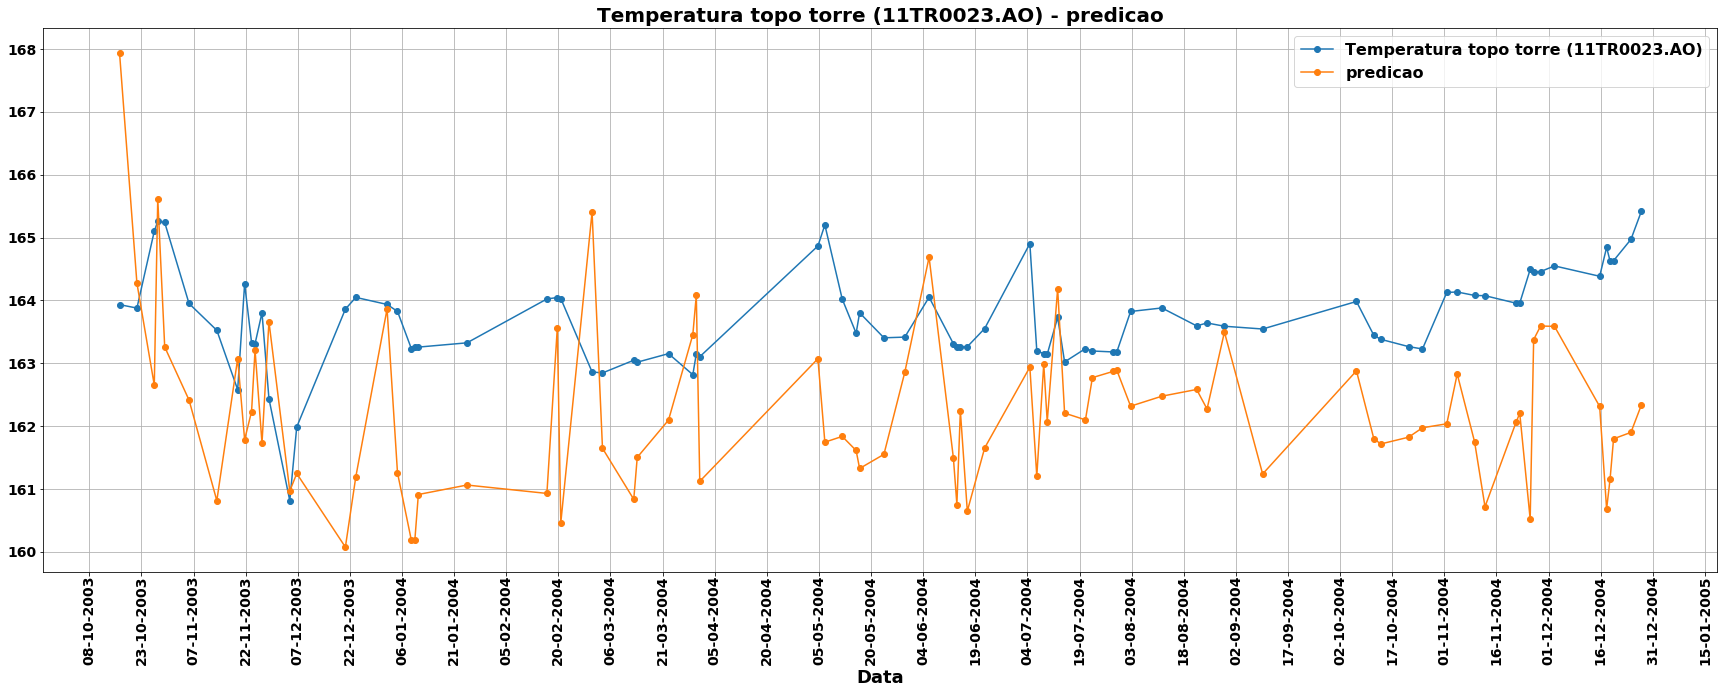

In [691]:
plot_full(df_result, [label,'predicao'], df_result.index.min(), df_result.index.max(),
                    minutes_interval=60, days_interval=15)

__Validação__

In [692]:
df_validation = df[~df.index.isin(df_bom.index)]

In [693]:
X_test_val = df_validation.filter(items=cols)
y_test_val = df_validation[label]

X_test_val_norm = normalizador.transform(X_test_val)

y_predict_val = model_k.predict(X_test_val_norm)
y_predict_val = pd.Series(map(lambda x: x[0], y_predict_val)).values

rmse = np.sqrt(mean_squared_error(y_test_val, y_predict_val))
print('RMSE ::>> '+str(rmse))
print('Score R2 ::>> '+str(r2_score(y_test_val, y_predict_val)))

pred_val = pd.DataFrame({'predicao': y_predict_val,'Date': y_test_val.index}).set_index(['Date'])
df_result_val = pd.concat([y_test_val, pred_val], axis=1)

RMSE ::>> 3.868074964734211
Score R2 ::>> -2.895949457512893


(5007, 2)


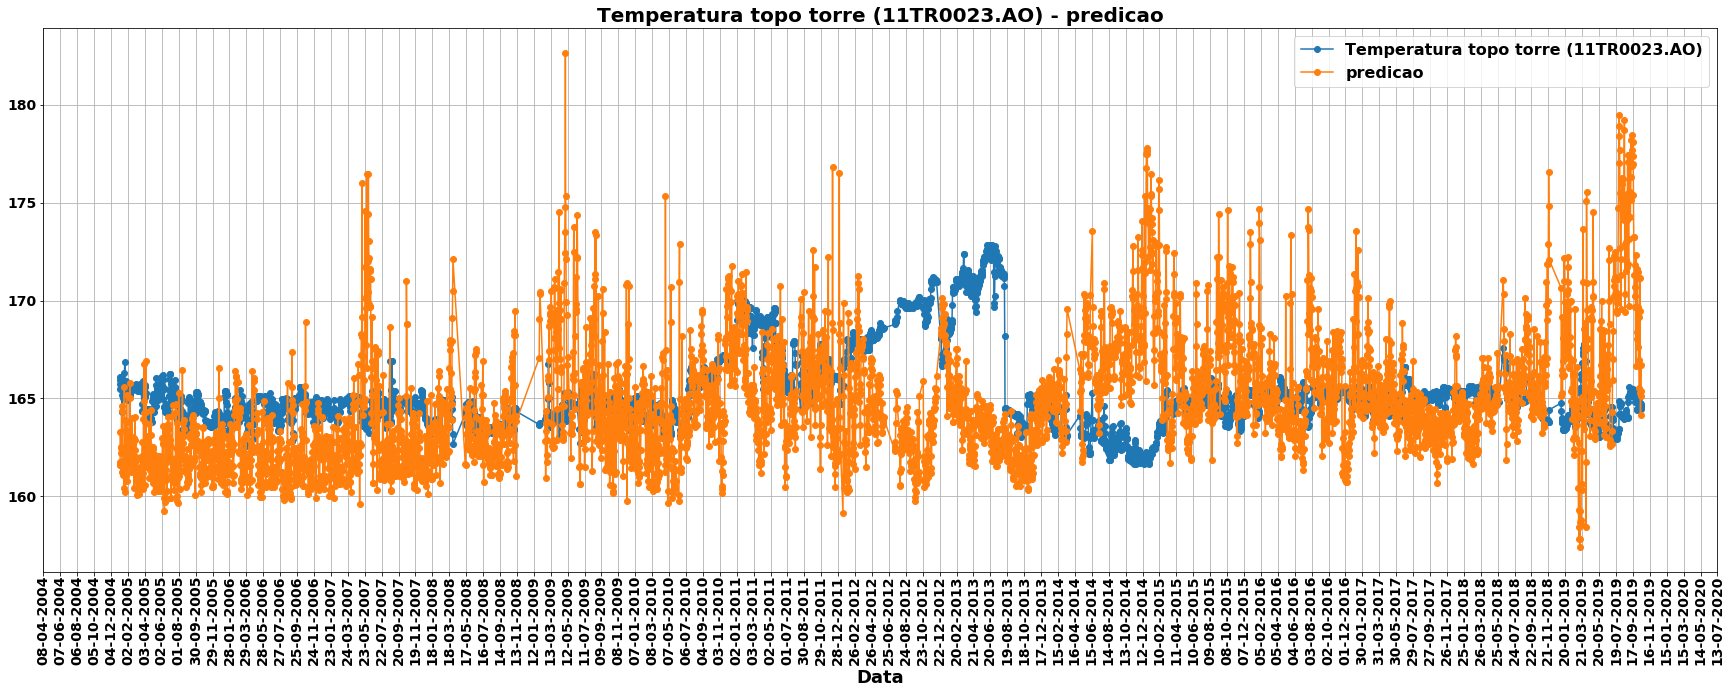

In [694]:
plot_full(df_result_val, [label,'predicao'], df_result_val.index.min(), df_result_val.index.max(),
                    minutes_interval=5, days_interval=60)

(5007, 2)


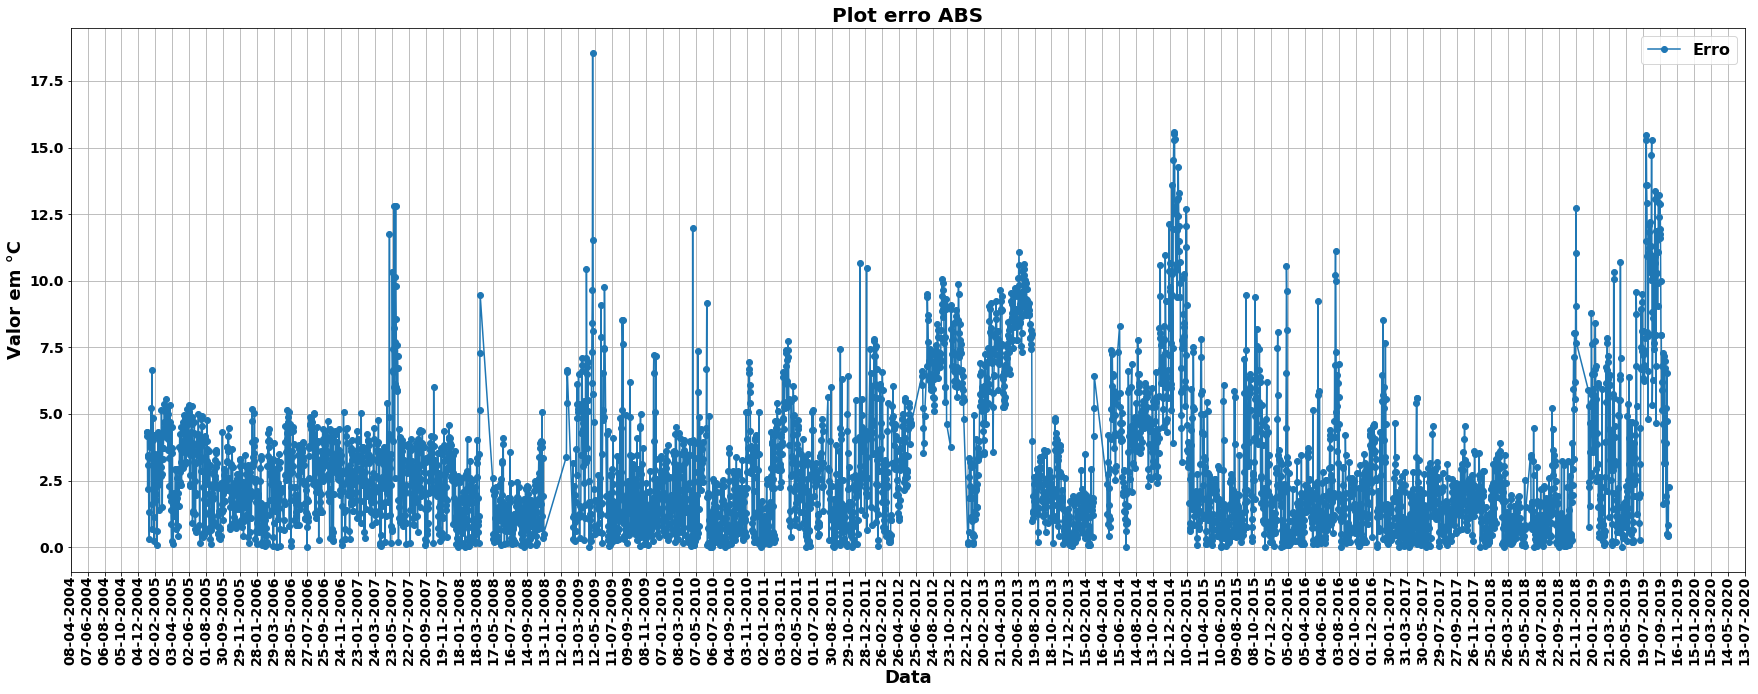

In [695]:
ini = df_result_val.index.min()
fim = df_result_val.index.max()

params = {
    'minutes_interval':5, 
    'days_interval':60,
    'titulo': 'Plot erro ABS',
    'ylabel': 'Valor em °C',
    'rolling_time':1,
    'error': True,
    'abs_error': True,
}

plot_full(df_result_val, 
            [label,'predicao'],
            ini, fim, **params);

__Save__

In [640]:
pickle.dump(model_dt, open(os.path.join("out",'modelo_dt.m'), 'wb'))
pickle.dump(scaler, open(os.path.join("out",'scaler_class.m'), 'wb'))
pickle.dump(model_class, open(os.path.join("out",'modelo_class.m'), 'wb'))
pickle.dump(normalizador, open(os.path.join("out",'norm_model_k.m'), 'wb'))